In [1]:
import pandas as pd
import jupyter as jp
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path

In [2]:
toxified_patch_df=pd.read_csv('toxified_patch.csv')

In [3]:
verdant_tether_df=pd.read_csv('verdant_tether.csv')

In [4]:
healing_dart_df=pd.read_csv('healing_dart.csv')

In [5]:
armor_spikes_df=pd.read_csv('armor_spikes.csv')

In [6]:
profit_comp_df=toxified_patch_df.drop(columns=['unit_price','material_price'])

In [7]:
profit_comp_df

datetime  potential_profit
0    2023-12-22 18:41:00            970.40
1    2023-12-22 19:41:00           1015.80
2    2023-12-22 20:41:00           1088.96
3    2023-12-22 21:41:00           1165.44
4    2023-12-22 22:41:00           1255.80
..                   ...               ...
280  2024-01-03 11:41:00            452.06
281  2024-01-03 12:41:00            351.78
282  2024-01-03 13:41:00            351.70
283  2024-01-03 14:41:00            303.78
284  2024-01-03 15:41:00            455.06

[285 rows x 2 columns]

In [8]:
profit_comp_df=profit_comp_df.set_index('datetime')

In [9]:
profit_comp_df

potential_profit
datetime                             
2023-12-22 18:41:00            970.40
2023-12-22 19:41:00           1015.80
2023-12-22 20:41:00           1088.96
2023-12-22 21:41:00           1165.44
2023-12-22 22:41:00           1255.80
...                               ...
2024-01-03 11:41:00            452.06
2024-01-03 12:41:00            351.78
2024-01-03 13:41:00            351.70
2024-01-03 14:41:00            303.78
2024-01-03 15:41:00            455.06

[285 rows x 1 columns]

In [10]:
profit_comp_df=profit_comp_df.rename(columns={'potential_profit':'Toxified Patch (LW)'})

In [11]:
profit_comp_df

Toxified Patch (LW)
datetime                                
2023-12-22 18:41:00               970.40
2023-12-22 19:41:00              1015.80
2023-12-22 20:41:00              1088.96
2023-12-22 21:41:00              1165.44
2023-12-22 22:41:00              1255.80
...                                  ...
2024-01-03 11:41:00               452.06
2024-01-03 12:41:00               351.78
2024-01-03 13:41:00               351.70
2024-01-03 14:41:00               303.78
2024-01-03 15:41:00               455.06

[285 rows x 1 columns]

In [14]:
verdant_tether_df=verdant_tether_df.set_index('datetime')
healing_dart_df=healing_dart_df.set_index('datetime')
armor_spikes_df=armor_spikes_df.set_index('datetime')

In [15]:
profit_comp_df['Verdant Tether (TL)']=verdant_tether_df['potential_profit']
profit_comp_df['Healing Darts (ENG)']=healing_dart_df['potential_profit']
profit_comp_df['Armor Spikes (BS)']=armor_spikes_df['potential_profit']
profit_comp_df


Toxified Patch (LW)  Verdant Tether (TL)  \
datetime                                                        
2023-12-22 18:41:00               970.40                 3.41   
2023-12-22 19:41:00              1015.80                29.50   
2023-12-22 20:41:00              1088.96                10.65   
2023-12-22 21:41:00              1165.44                55.45   
2023-12-22 22:41:00              1255.80                51.31   
...                                  ...                  ...   
2024-01-03 11:41:00               452.06              -194.49   
2024-01-03 12:41:00               351.78               -12.09   
2024-01-03 13:41:00               351.70              -136.00   
2024-01-03 14:41:00               303.78                -9.42   
2024-01-03 15:41:00               455.06              -162.46   

                     Healing Darts (ENG)  Armor Spikes (BS)  
datetime                                                     
2023-12-22 18:41:00               345.34             -56.15  
2023-12-22 19:41:00               264.79             -61.52  
2023-12-22 20:41:00               299.79           -2030.10  
2023-12-22 21:41:00               140.62           -1987.05  
2023-12-22 22:41:00               315.62           -1677.69  
...                                  ...                ...  
2024-01-03 11:41:00               939.59             349.61  
2024-01-03 12:41:00               990.14             365.75  
2024-01-03 13:41:00               937.24             700.39  
2024-01-03 14:41:00               943.15             674.07  
2024-01-03 15:41:00              1042.14             762.82  

[285 rows x 4 columns]

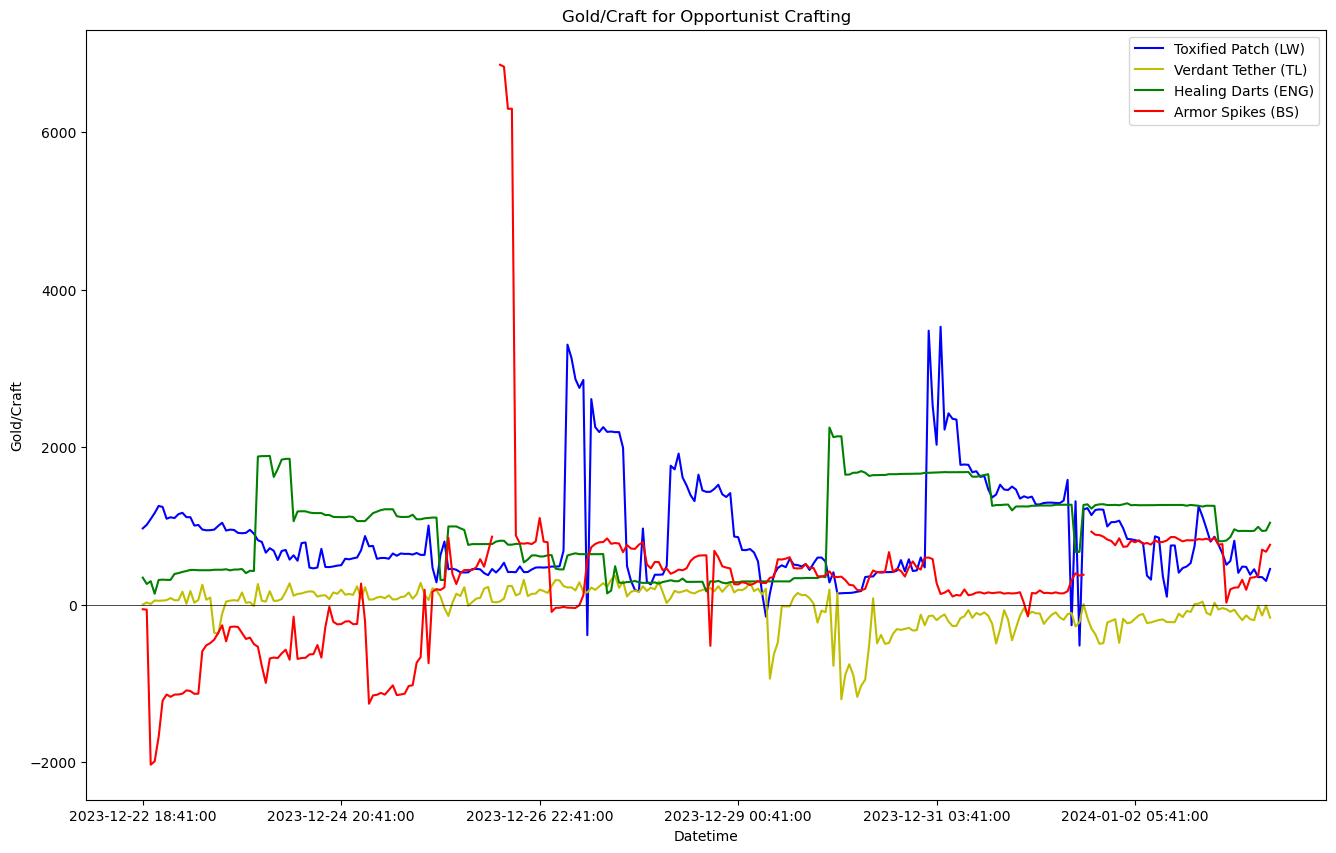

In [50]:
ax=profit_comp_df.plot(figsize=(16,10),xlabel="Datetime",ylabel="Gold/Craft",title="Gold/Craft for Opportunist Crafting",color=['b','y','g','r'])
ax.axhline(0, color='black', linewidth=0.5)

([0, 1, 2, 3],
 [Text(0, 0, 'Toxified Patch (LW)'),
  Text(1, 0, 'Verdant Tether (TL)'),
  Text(2, 0, 'Healing Darts (ENG)'),
  Text(3, 0, 'Armor Spikes (BS)')])

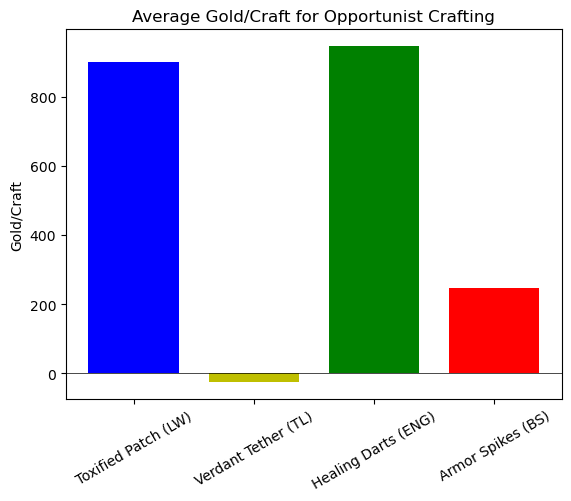

In [48]:
plt.bar(["Toxified Patch (LW)","Verdant Tether (TL)","Healing Darts (ENG)","Armor Spikes (BS)"],profit_comp_df.mean(),.75,
        color=['b','y','g','r'])
plt.ylabel("Gold/Craft")
plt.title("Average Gold/Craft for Opportunist Crafting")
plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(rotation=30)